In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_autoconsumo = pd.read_parquet('df_autoconsumo.parquet')


In [4]:
df_autoconsumo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25845 entries, 0 to 25844
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id_exp              25845 non-null  uint32        
 1   dni                 25332 non-null  Int32         
 2   nif                 513 non-null    Int32         
 3   fecha_alta_exp      25845 non-null  datetime64[ms]
 4   fecha_registro_exp  25845 non-null  datetime64[ms]
 5   municipio           25845 non-null  string        
 6   provincia           25845 non-null  string        
 7   es_telematica       25845 non-null  boolean       
dtypes: Int32(2), boolean(1), datetime64[ms](2), string(2), uint32(1)
memory usage: 1.2 MB


# Transform dataframe to analyze.
Objective: time series gruped by date, for each day: 
- total expedientes
- num persona fisica
- num persona juridica
- num telematica
- num papel


In [5]:
df_autoconsumo.set_index('fecha_registro_exp', inplace=True)

In [9]:
df_autoconsumo_group = df_autoconsumo.resample('D').agg(
    total_exp=('id_exp', 'count'),
    total_pfisica=('dni', 'nunique'),
    total_pjuridica=('nif', 'nunique'),
    total_online=('es_telematica', 'sum'),
    total_presencial=('es_telematica', lambda x: (~x).sum())
).fillna(0).reset_index()

In [10]:
df_autoconsumo_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   fecha_registro_exp  740 non-null    datetime64[ms]
 1   total_exp           740 non-null    int64         
 2   total_pfisica       740 non-null    int64         
 3   total_pjuridica     740 non-null    int64         
 4   total_online        740 non-null    Int64         
 5   total_presencial    740 non-null    int32         
dtypes: Int64(1), datetime64[ms](1), int32(1), int64(3)
memory usage: 32.6 KB


In [11]:
df_autoconsumo_group.head()

,fecha_registro_exp,total_exp,total_pfisica,total_pjuridica,total_online,total_presencial
0,2021-12-22,317,292,2,316,1
1,2021-12-23,282,263,3,282,0
2,2021-12-24,124,123,0,124,0
3,2021-12-25,22,22,0,22,0
4,2021-12-26,52,52,0,52,0


In [12]:
df_autoconsumo_group.set_index('fecha_registro_exp', inplace=True)

<Axes: title={'center': 'Total Expedientes'}, xlabel='fecha_registro_exp'>

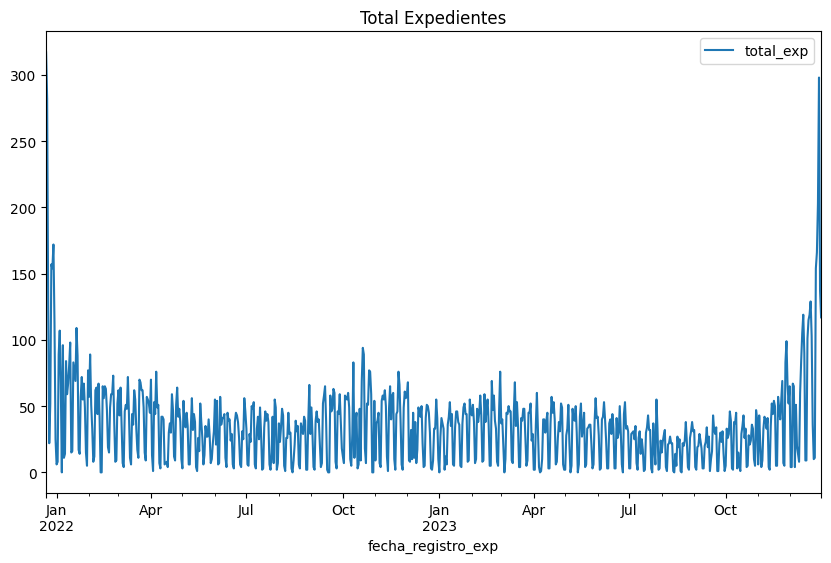

In [15]:
df_autoconsumo_group.plot( y='total_exp', figsize=(10, 6), title="Total Expedientes")


<Axes: title={'center': 'Expedientes'}, xlabel='fecha_registro_exp'>

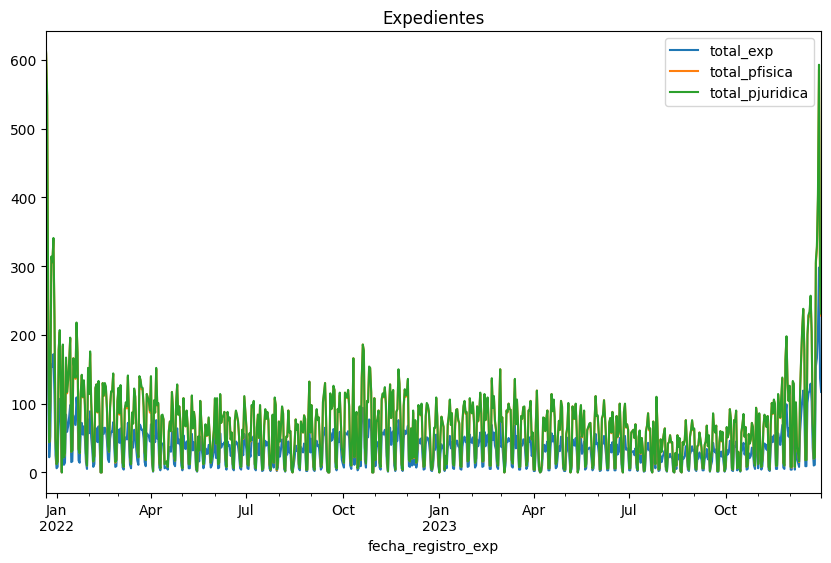

In [17]:
df_autoconsumo_group[['total_exp', 'total_pfisica', 'total_pjuridica']].plot(
    stacked=True, figsize=(10, 6), title="Expedientes"
)

<Axes: title={'center': 'Física vs jurídica'}, xlabel='fecha_registro_exp'>

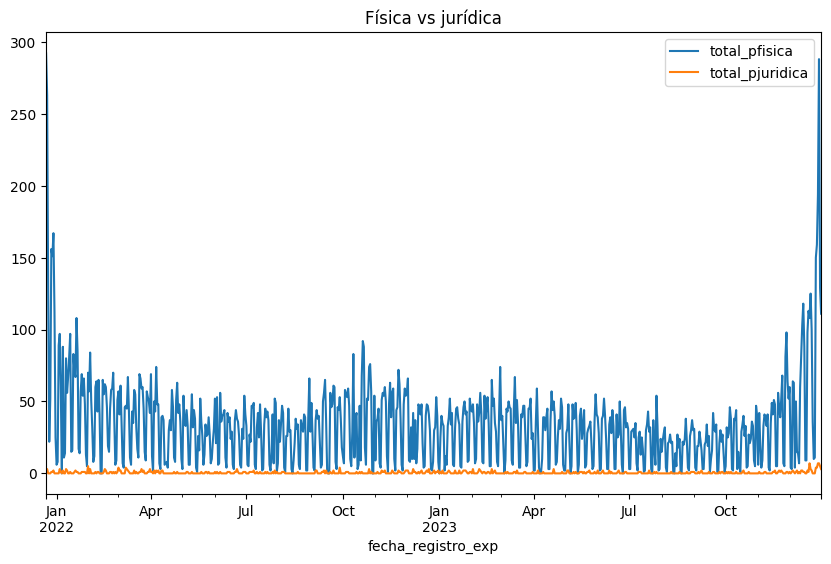

In [20]:
df_autoconsumo_group.plot( y=['total_pfisica', 'total_pjuridica'], figsize=(10, 6), title="Física vs jurídica")


C:\Users\flipe\AppData\Local\Temp\ipykernel_6460\1116835108.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_autoconsumo_group.resample('M').sum().plot(y='total_exp', figsize=(10, 6), title="Total mensual")


<Axes: title={'center': 'Total mensual'}, xlabel='fecha_registro_exp'>

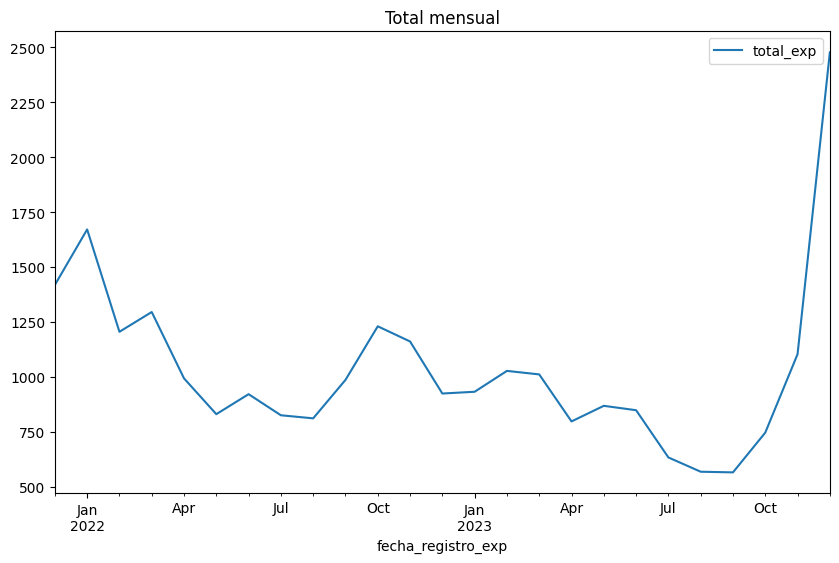

In [21]:
df_autoconsumo_group.resample('M').sum().plot(y='total_exp', figsize=(10, 6), title="Total mensual")
